In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from pathlib import Path

plt.style.use("bmh")

In [32]:
data = pd.read_csv(Path("out/results_2023-03-26_23:09:54.176978.csv"))
data.head()

,Unnamed: 0,round,endpoint_id,accuracy,loss,transfer_time,num_hidden_layers,store
0,0,0,local:0,0.473333,1.932167,0.000010,1,no_store
1,1,0,local:1,0.466667,1.987247,0.000007,1,no_store
2,2,0,local:2,0.526667,1.792996,0.000017,1,no_store
3,3,1,local:0,0.670000,0.982148,0.000012,1,no_store
4,4,1,local:1,0.720000,0.969895,0.000009,1,no_store


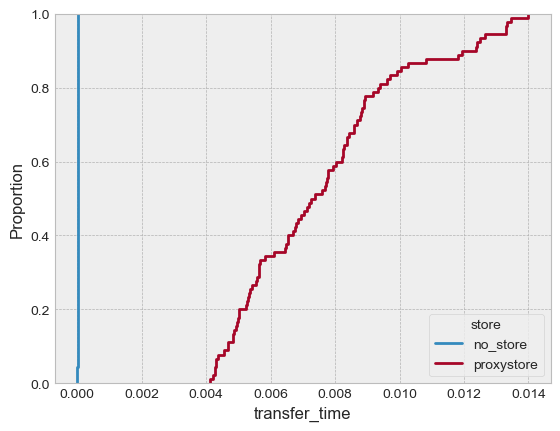

In [12]:
sns.ecdfplot(data=data, x="transfer_time", hue="store")
plt.show()

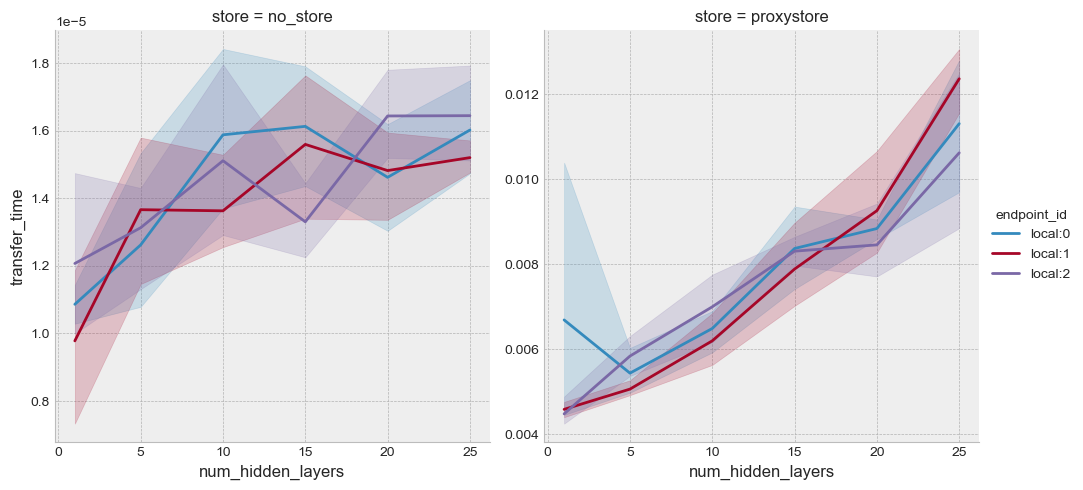

In [26]:
sns.relplot(
    data=data,
    kind="line",
    col="store",
    x="num_hidden_layers",
    y="transfer_time",
    hue="endpoint_id",
    facet_kws=dict(sharey=False)
)
plt.show()

In [66]:
df = data.groupby(["store", "num_hidden_layers"])["transfer_time"].mean()
(df.proxystore - df.no_store) / df.no_store  # Percentage increase from No-Store to ProxyStore
# (df.no_store - df.proxystore) / df.proxystore  # Percentage increase from ProxyStore to No-Store

num_hidden_layers
1     480.473525
5     413.423239
10    440.094369
15    544.562489
20    577.909098
25    718.584295
Name: transfer_time, dtype: float64

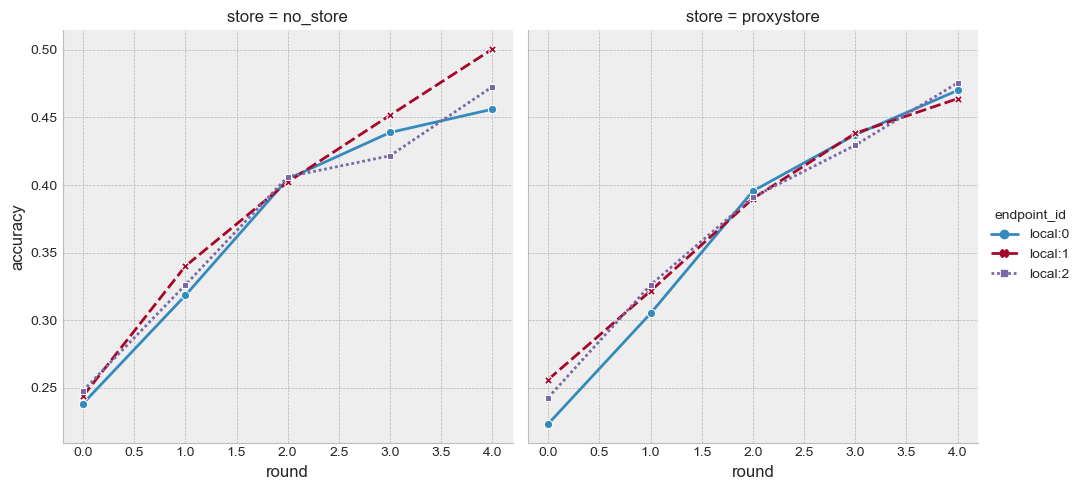

In [17]:
sns.relplot(
    data=data,
    kind="line",
    col="store",
    x="round",
    y="accuracy",
    hue="endpoint_id",
    markers=True,
    style="endpoint_id",
    errorbar=None,
)
plt.show()